In [56]:
import pandas as pd
import os
import matplotlib as plt
import numpy as np

### Merging all the sales data by month into a single CSV file.

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [3]:
all_data = pd.read_csv("./all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


###  Clean up the data!

#### figure out missing values NAN and drop them

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Error msg: invalid literal for int() with base 10: 'Or', so find "Or" and delete it

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

#### Error msg: can't multiply sequence by non-int of type 'str'. Those columns are coded as strings (even though looked like numbers), so need conversions.

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### What was the best month for sales? How much was earned that month?

#### Augment data with additional columns

#### 1. Add month column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
### got error with 'nan' and 'or', fixed in cleaning above

#### 2. Add sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
## got error: can't multiply sequence by non-int of type 'str', fixed in cleaning above
all_data.sort_values(by = "Sales", ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
29834,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00
173613,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00
89549,200528,Macbook Pro Laptop,2,1700.00,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.00
30336,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00
137282,278637,ThinkPad Laptop,2,999.99,10/02/19 16:06,"643 Cedar St, Boston, MA 02215",10,1999.98
...,...,...,...,...,...,...,...,...
92238,203086,AAA Batteries (4-pack),1,2.99,05/22/19 17:01,"567 Meadow St, San Francisco, CA 94016",5,2.99
92230,203078,AAA Batteries (4-pack),1,2.99,05/06/19 11:53,"693 Dogwood St, Atlanta, GA 30301",5,2.99
92222,203070,AAA Batteries (4-pack),1,2.99,05/22/19 08:29,"451 12th St, Los Angeles, CA 90001",5,2.99
92194,203042,AAA Batteries (4-pack),1,2.99,05/23/19 13:15,"492 Washington St, San Francisco, CA 94016",5,2.99


In [10]:
all_data.groupby('Month').sum()['Sales'].sort_values(ascending = False)
## so the month with highest sales is December

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Month number')

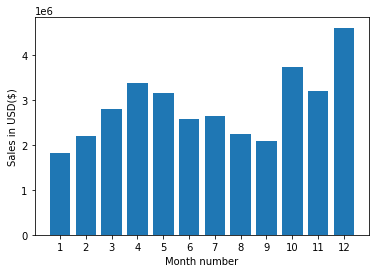

In [12]:
months = range(1,13)
results = all_data.groupby('Month').sum()['Sales']
plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')

### What city has the highest number of sales?

In [13]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### 1. Create city and state column

In [14]:
## Use .apply()
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[2][0:3])
all_data['City State']= all_data['City'] + ''+ all_data['State']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


Text(0.5, 0, 'City Name')

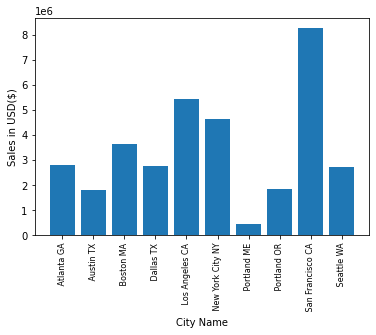

In [16]:
##unique value for x-axis
#cities = all_data['City State'].unique()
##however, the order of unique city names don't correspond to the results
##Solution:
cities =[city for city, df in all_data.groupby("City State")]

print(cities)

results = all_data.groupby('City State').sum()['Sales']
plt.bar(cities, results)
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')

### What time should we display advertisements to maximize the likelihood of customers buying the product?

In [17]:
### aggregate order date to see the sales distribution over time.

#### Convert the order date into Datetime object ( resistent to formate change of the date column )

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


In [20]:
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State,Hours
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA,12


Text(0.5, 0, 'Hours')

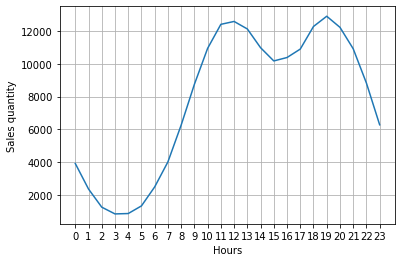

In [21]:
hours = [hour for hour, df in all_data.groupby('Hours')]
hoursale = all_data.groupby('Hours').count()['Quantity Ordered']
plt.plot(hours, hoursale)
plt.xticks(hours)
plt.grid()
plt.ylabel('Sales quantity')
plt.xlabel('Hours')

### What products are often sold together?

#### See which order number is duplicated

In [22]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State,Hours
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,Boston MA,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,Boston MA,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,Boston MA,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,Boston MA,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,New York City NY,14


In [23]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/var/folders/6n/f8k2sb4519748tczb7wp796c0000gn/T/ipykernel_40296/759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City State,Hours,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,MA,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,MA,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,MA,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,MA,Boston MA,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,NY,New York City NY,14,"Vareebadd Phone,USB-C Charging Cable"


In [24]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [25]:
from itertools import combinations
from collections import Counter

In [26]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sells the most and why it sells the most?

In [39]:
product_group = all_data.groupby('Product')
product = [product for product, df in product_group]
quantity = product_group.sum()['Quantity Ordered']

Text(0, 0.5, 'Quantity ordered')

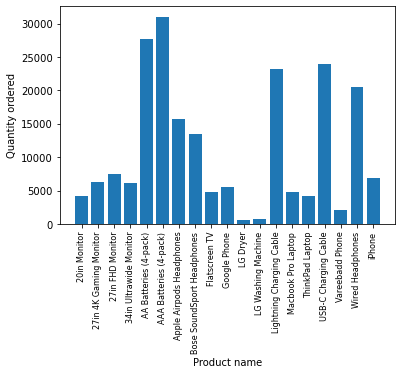

In [44]:
plt.bar(product, quantity)
plt.xticks(product, rotation= 'vertical', size = 8)
plt.xlabel('Product name')
plt.ylabel('Quantity ordered')

In [45]:
price = product_group.mean()['Price Each']

/var/folders/6n/f8k2sb4519748tczb7wp796c0000gn/T/ipykernel_40296/935058116.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical', size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

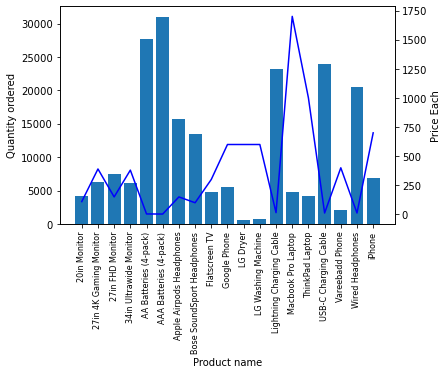

In [62]:
fig1, ax1 = plt.pyplot.subplots()
ax2 = ax1.twinx()

ax1.bar(product, quantity)
ax2.plot(product, price, 'b-')

ax1.set_ylabel('Quantity ordered')
ax2.set_ylabel('Price Each')
ax1.set_xlabel('Product name')
ax1.set_xticklabels(product, rotation = 'vertical', size = 8)

